<a href="https://colab.research.google.com/github/Vcetpreeti/DS_internship/blob/main/loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
train_data = pd.read_csv('/content/train_loan.csv')
test_data = pd.read_csv('/content/test_loan.csv')

In [ ]:
train_data.shape

(614, 13)

In [ ]:
test_data.shape

(367, 12)

In [ ]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
test_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
def preprocess_data(df):
    num_imputer = SimpleImputer(strategy='median')
    df[df.select_dtypes(include=['number']).columns] = num_imputer.fit_transform(df.select_dtypes(include=['number']))

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[df.select_dtypes(include=['object']).columns] = cat_imputer.fit_transform(df.select_dtypes(include=['object']))

    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders


In [ ]:
train_data['ApplicantIncome'].fillna((train_data['ApplicantIncome'].mean()), inplace=True)
train_data['CoapplicantIncome'].fillna((train_data['CoapplicantIncome'].mean()), inplace=True)
train_data['LoanAmount'].fillna((train_data['LoanAmount'].mean()), inplace=True)
train_data['Loan_Amount_Term'].fillna((train_data['Loan_Amount_Term'].mean()), inplace=True)
train_data['Credit_History'].fillna((train_data['Credit_History'].mean()), inplace=True)

train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
test_data['ApplicantIncome'].fillna((test_data['ApplicantIncome'].mean()), inplace=True)
test_data['CoapplicantIncome'].fillna((test_data['CoapplicantIncome'].mean()), inplace=True)
test_data['LoanAmount'].fillna((test_data['LoanAmount'].mean()), inplace=True)
test_data['Loan_Amount_Term'].fillna((test_data['Loan_Amount_Term'].mean()), inplace=True)
test_data['Credit_History'].fillna((test_data['Credit_History'].mean()), inplace=True)
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
if 'Married' in train_data.columns:
  train_data['Married'].fillna(('No'), inplace=True)
if 'Education' in train_data.columns:
  train_data['Education'].fillna(('Graduate'), inplace=True)
if 'Self_Employed' in train_data.columns:
  train_data['Self_Employed'].fillna(('Yes'), inplace=True)
if 'Gender' in train_data.columns:
  train_data['Gender'].fillna(('Female'), inplace=True)
if 'Married' in train_data.columns:
  test_data['Married'].fillna(('No'), inplace=True)
if 'Education' in test_data.columns:
  test_data['Education'].fillna(('Graduate'), inplace=True)
if 'Self_Employed' in test_data.columns:
  test_data['Self_Employed'].fillna(('Yes'), inplace=True)
if 'Gender' in test_data.columns:
  test_data['Gender'].fillna(('Female'), inplace=True)
if 'Dependents' in test_data.columns:
  test_data['Dependents'].fillna(('Yes'), inplace=True)
if 'Dependents' in train_data.columns:
  test_data['Dependents'].fillna(('Yes'), inplace=True)

In [ ]:
train_data.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
test_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df):
    # Handle numerical features
    num_imputer = SimpleImputer(strategy='median')
    num_features = df.select_dtypes(include=['number']).columns
    if num_features.size > 0: # Check if there are any numerical columns
        df[num_features] = num_imputer.fit_transform(df[num_features])

    # Handle categorical features
    cat_imputer = SimpleImputer(strategy='most_frequent')
    cat_features = df.select_dtypes(include=['object']).columns
    if cat_features.size > 0: # Check if there are any categorical columns
        df[cat_features] = cat_imputer.fit_transform(df[cat_features])

        label_encoders = {}
        for column in cat_features:
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le
    else:
        label_encoders = {} # Return an empty dictionary if no categorical columns

    return df, label_encoders

# Assuming 'train_data' is already defined as a pandas DataFrame
train_data, label_encoders = preprocess_data(train_data.copy()) # Create a copy to avoid modifying the original DataFrame

In [47]:
#defining X and Y
X = train_data.drop('Loan_Status', axis=1)
y = train_data['Loan_Status']


In [48]:
 #Encode the target variable
y = LabelEncoder().fit_transform(y)


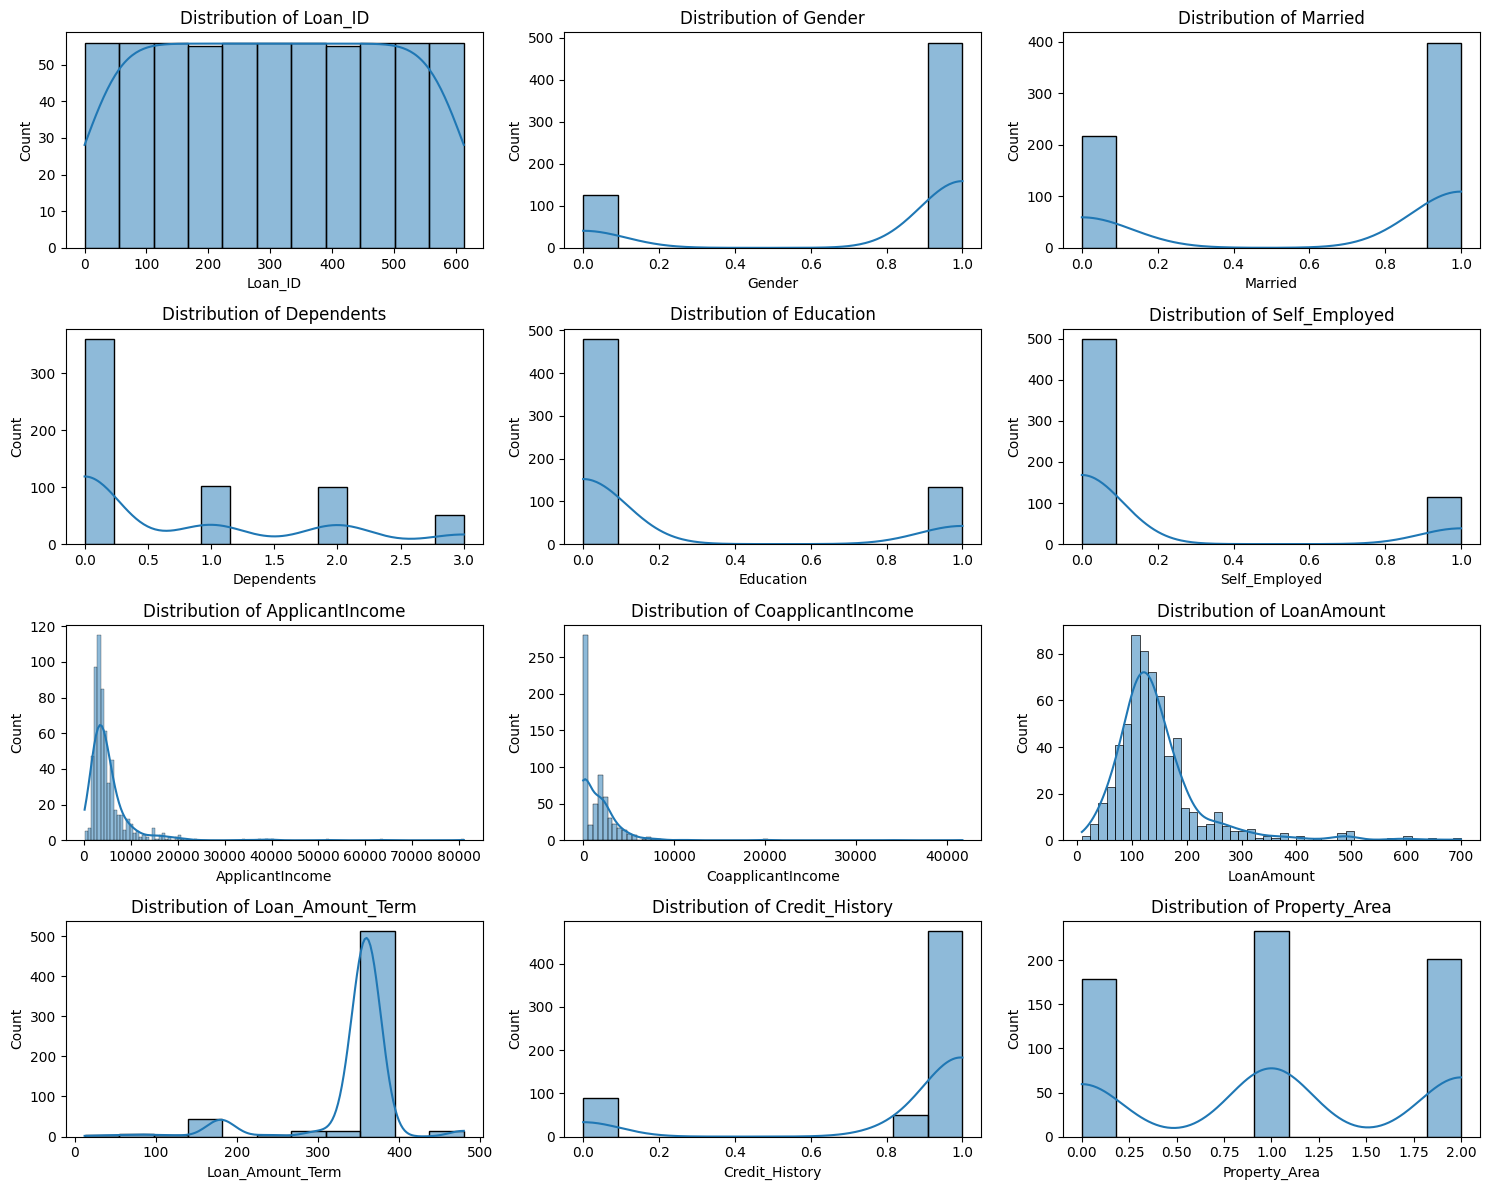

In [49]:
numerical_features = X.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12)) # Increased figure height for better display
for i, col in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1) # Changed grid to 4 rows x 3 columns
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [51]:
# Visualizing categorical features count
categorical_features = X.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=train_data, x=col)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

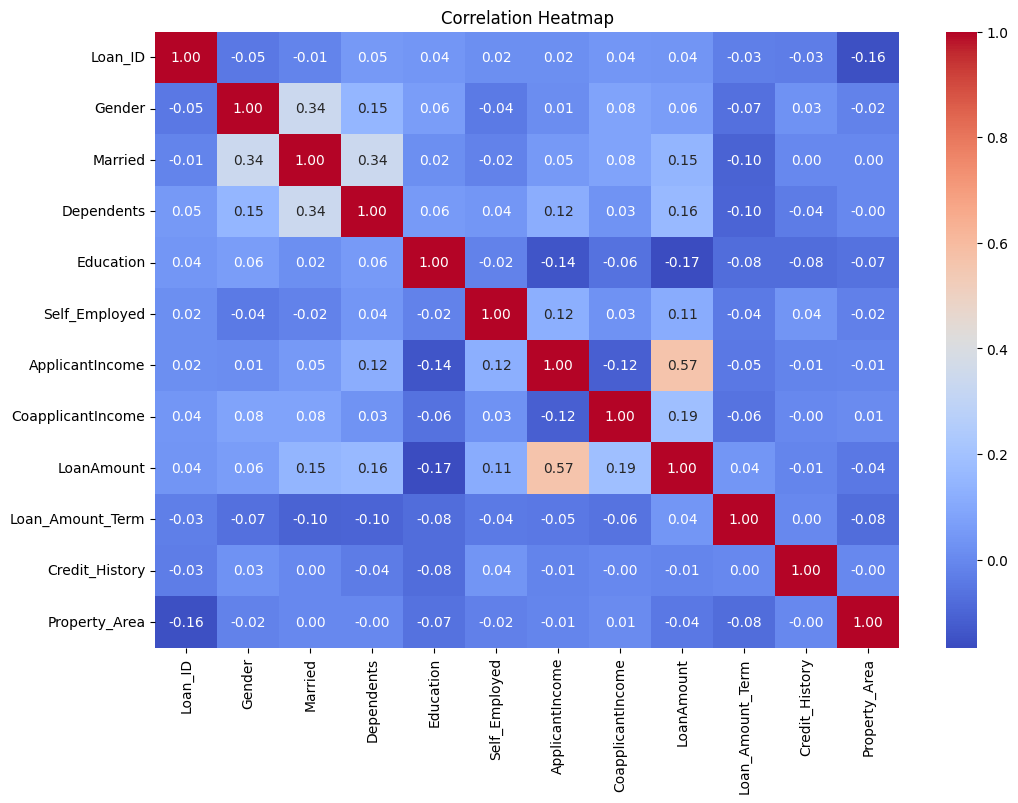

In [52]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [57]:
y_pred = rf_model.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_pred)

In [56]:
# Train the model for feature importance and confusion matrix
from sklearn.ensemble import RandomForestClassifier
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

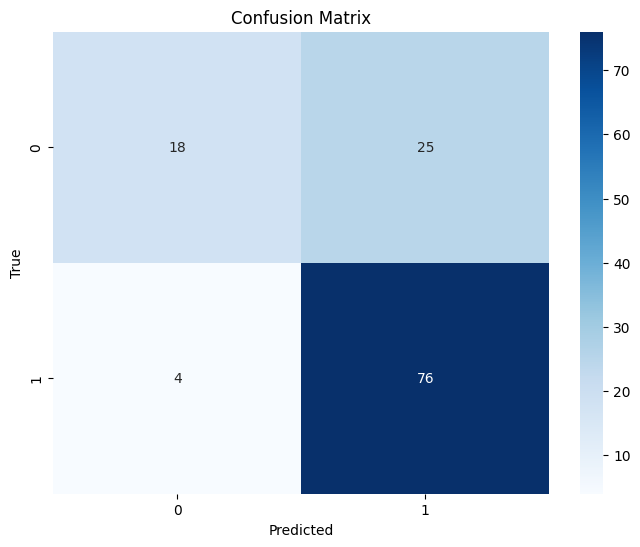

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [59]:
# Feature importance visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


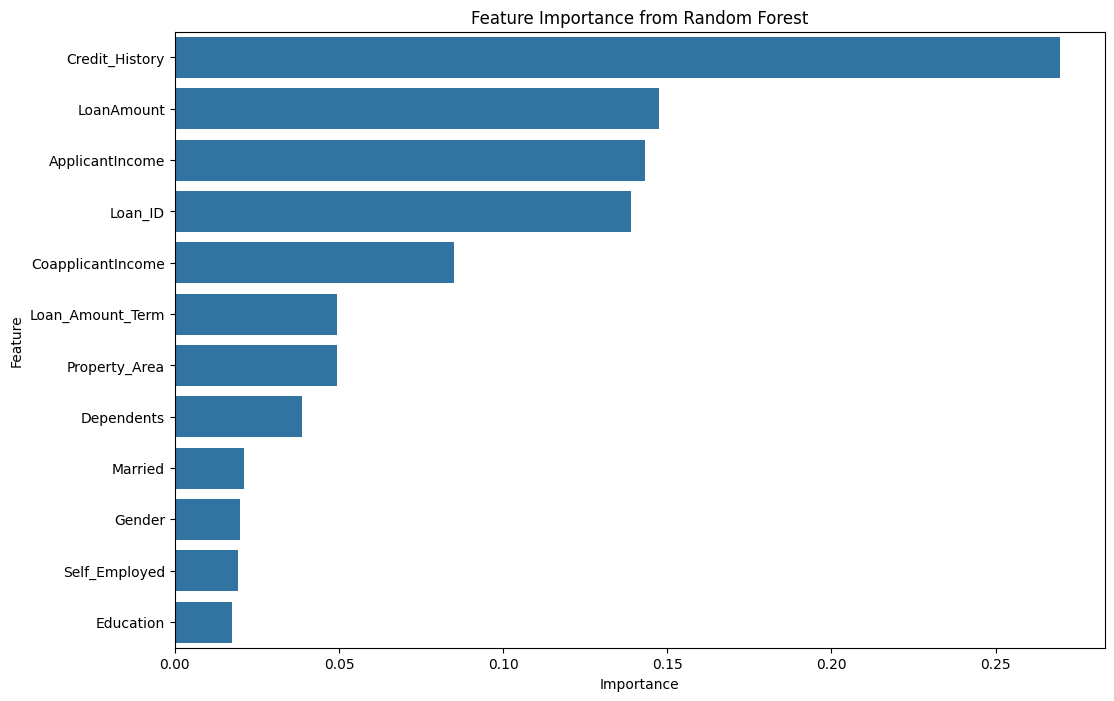

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title('Feature Importance from Random Forest')
plt.show()

In [61]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [62]:
#train model
rf_model.fit(X_train, y_train)

# Validate the model
y_pred = rf_model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7642276422764228
Confusion Matrix:
 [[18 25]
 [ 4 76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

